In [1]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments as toy
import matplotlib.pyplot as plt
from scipy.stats import moment



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0004, 500]


times = np.linspace(0, 97, 9700)

org_values = model.simulate(true_parameters, times)

# print(org_values)

print(org_values.shape)


# moment_0 = moment(org_values, moment=0, axis=1)
# moment_0
# print(moment_0.shape)

# 1st moment is mean, 1st centred moment should be array 6
# centred_moment_1 = moment(org_values, moment=1, axis=1)
# centred_moment_2 = moment(org_values, moment=2, axis=1)
# centred_moment_3 = moment(org_values, moment=3, axis=1)
# centred_moment_4 = moment(org_values, moment=4, axis=1)
# centred_moment_5 = moment(org_values, moment=5, axis=1)

# centred_moments = np.zeros((9700,5))
# centred_moments[:,0] = centred_moment_1
# centred_moments[:,1] = centred_moment_2
# centred_moments[:,2] = centred_moment_3
# centred_moments[:,3] = centred_moment_4
# centred_moments[:,4] = centred_moment_5




# print(centred_moments.shape)


(9700, 5)


Add noise to the data (using random sampling from normal distribution)

In [6]:

# noise = 9
# values = org_values + np.random.normal(0, noise, org_values.shape)

size_noise = 5
noise_value = 9
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]


Set-up pints problem and log likelihoods

In [10]:

problem = pints.MultiOutputProblem(model, times, org_values)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 2
New dimension: 7


Create uniform log prior

In [11]:

# Define the size of the list
size = 7
placeholder_lower_value = 0
placeholder_upper_value = 50
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.0001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 1
prior_arr_upper[1] = 10000

# log_prior = pints.UniformLogPrior(
#     [0.000001, 1, 1],
#     [0.01, 10000, 100]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_57072/1142099464.py:18: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [12]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]

chains = pints.mcmc_sample(log_posterior, 3, xs)

print(chains)



Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:02.0
1     6      0         0         0          0:02.6
2     9      0         0         0.333      0:03.4
3     12     0         0         0.25       0:04.1
20    63     0.0952    0         0.0476     0:12.7
40    123    0.0488    0.0244    0.0244     0:19.0
60    183    0.0492    0.0164    0.0164     0:23.4
80    243    0.037     0.0247    0.0247     0:28.3
100   303    0.0297    0.0297    0.0198     0:34.1
120   363    0.0248    0.0248    0.0165     0:39.5
140   423    0.0213    0.0213    0.0213     0:42.3
160   483    0.0186    0.0186    0.0186     0:48.4
180   543    0.0166    0.0221    0.0276     0:56.2
Initial phase completed.
200   603    0.0149    0.0199    0.0249     1:01.9
220   663    0.0136    0.0271    0.0407     1:34.5
240   723    0.0249    0.0539    0.0622     2:15.2
260   783   

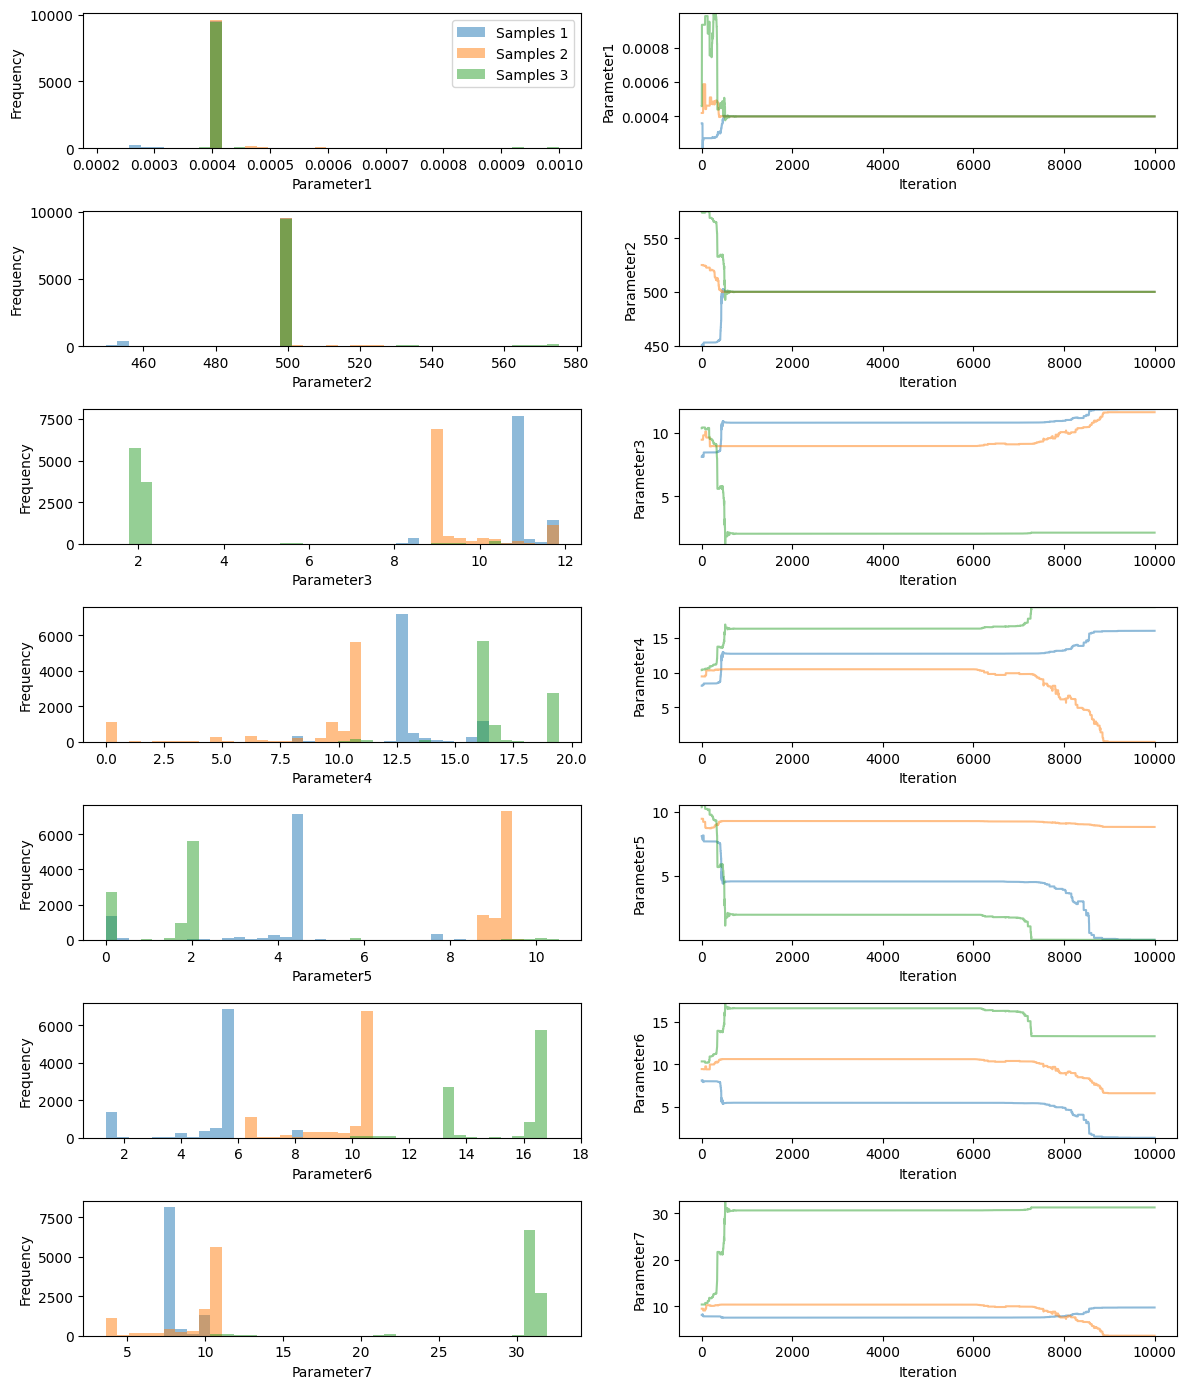

In [13]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()